# Group Project


In your Wednesday Group, pick a famous person on Twitter and estimate whether they follow more men or women on Twitter. When done, evaluate the strenght of your study.


Thinks to know:
* On Twitter, the people that you follow are called your "friends". The people that follow you are called "followers."
* [Twython](https://twython.readthedocs.io/en/latest/api.html) has a method (get_friends_list) for returning a list of up to 200 friends. The relevant parameters are `screen_name` and `count`. In your study today, only look at the 200 most recent friends.
* You can use my API but don't use it too much. There are strict [rate limits](https://developer.twitter.com/en/docs/basics/rate-limits.html). 
* The python package [`gender_guesser`](https://pypi.org/project/gender-guesser/) can be used to estimate a person's gender based on first name. You will likely need to install it.

* Before you begin programming, write out each of the steps you'll need to do. 

Good luck!

In [1]:
%matplotlib inline

import pandas as pd
from twython import Twython
import gender_guesser.detector as gender


In [2]:
# My info
APP_KEY            = 'J8TGgv1SlKgAtqvxGZzc9XiNx'
APP_SECRET         = '8bEieGM73FLqbnWu6WcTR3vM6ICfEBEmQ8lXgqojw5IL1uzQ0Z'
OAUTH_TOKEN        = '594565064-wshfaIrt0SvJQzlm4Jj1Dl2N45yDnJMaj851UjMw'
OAUTH_TOKEN_SECRET = 'gqFB5xtegNnQKzSoH701POPRM9iK7QfJ2Wr0VMDweETse'


twitter = Twython(APP_KEY,
                  APP_SECRET,
                  OAUTH_TOKEN,
                  OAUTH_TOKEN_SECRET)

def get_friends(username):
    '''Grab the 200 most recent people follwed.'''
    user_friends = twitter.get_friends_list(screen_name=username,
                                           count = 200)
    friend_df = pd.DataFrame(user_friends['users'])
    return friend_df

In [3]:
d = gender.Detector()
def guess_gender(name):
    '''Guess gender based on first name'''
    name_split = name.split()
    first_name = name_split[0]
    gender = d.get_gender(first_name)
    return gender


In [4]:
def twitter_friend_genders(username):
    '''Estimate gender of a Twitter user's friends.'''
    friend_df = get_friends(username)
    friend_df['gender'] = friend_df['name'].apply(guess_gender)
    #reports
    friend_df['gender'].value_counts(normalize=True).plot(kind='bar')
    print(friend_df['gender'].value_counts())
    return friend_df

male             99
unknown          47
female           38
mostly_male       9
mostly_female     6
andy              1
Name: gender, dtype: int64


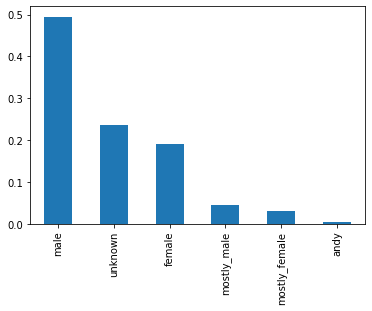

In [5]:
results = twitter_friend_genders('NateSilver538')